In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score
from scipy import stats
import statsmodels.api as sm
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from tabulate import tabulate
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
import umap.umap_ as umap
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.svm import OneClassSVM, SVC
from sklearn.neighbors import LocalOutlierFactor
from sklearn.mixture import GaussianMixture
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from pyod.models.copod import COPOD
from pathlib import Path

Data columns: ['Data', 'BDIY', 'CRY', 'Cl1', 'DXY', 'ECSURPUS', 'EMUSTRUU', 'EONIA', 'GBP', 'GT10', 'GTDEM10Y', 'GTDEM2Y', 'GTDEM30Y', 'GTGBP20Y', 'GTGBP2Y', 'GTGBP30Y', 'GTITL10YR', 'GTITL2YR', 'GTITL30YR', 'GTJPY10YR', 'GTJPY2YR', 'GTJPY30YR', 'JPY', 'LF94TRUU', 'LF98TRUU', 'LG30TRUU', 'LMBITR', 'LP01TREU', 'LUACTRUU', 'LUMSTRUU', 'MXBR', 'MXCN', 'MXEU', 'MXIN', 'MXJP', 'MXRU', 'MXUS', 'US0001M', 'USGG2YR', 'USGG30YR', 'USGG3M', 'VIX', 'XAUBGNL', 'Y']
Data shape: (1111, 42)
Total number of records: 1111
Time period: from 01/11/2000 to 04/20/2021
Frequency: W-TUE
Number of variables: 42
Number of anomalies: 237 (21.33%)

Metadata and statistics:


,Ticker,Description,Mean,Std.Dev,Min,Max,Missing values,Missing (%)
0,BDIY,Baltic Dry Index,2259.860486,2017.811888,291.00000,11793.00000,0,0.00%
1,CRY,TR/CC CRB ER Index,245.247649,68.278081,106.29290,467.57000,0,0.00%
2,Cl1,Generic 1st 'CL' Future,60.708101,25.900813,10.01000,140.97000,0,0.00%
3,DXY,DOLLAR INDEX SPOT,90.934982,11.379095,71.32900,119.82000,0,0.00%
4,ECSURPUS,Bloomberg ECO US Surprise Inde,0.036153,0.349453,-0.97400,0.99100,0,0.00%
5,EMUSTRUU,EM USD Aggregate,704.379495,309.951768,230.52670,1286.35300,0,0.00%
6,EONIA,EMMI EURO OverNight Index Aver,1.363676,1.721894,-0.49800,5.73000,0,0.00%
7,GBP,British Pound Spot,1.569618,0.212340,1.17230,2.08520,0,0.00%
8,GT10,US TREASURY N/B,3.266748,1.332464,0.50800,6.74800,0,0.00%
9,GTDEM10Y,BUNDESREPUB. DEUTSCHLAND,2.448365,1.851558,-0.79400,5.64400,0,0.00%


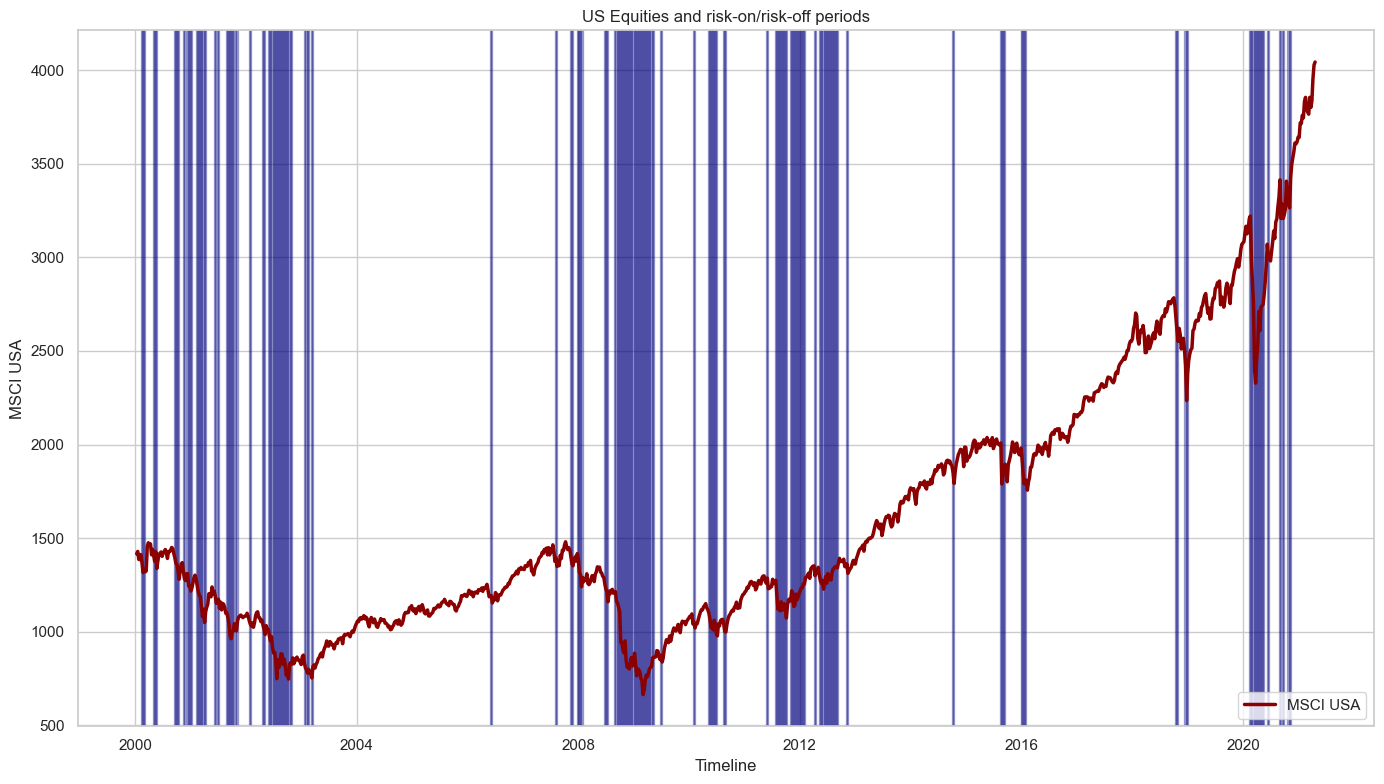

In [ ]:
# Define the file path for the dataset
file_path = Path('Data/Dataset4_EWS.xlsx')

# Set visualization style
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = [10, 6]

# Load the data from the Excel file
# First sheet contains market data with dates and anomaly labels, second sheet contains metadata
data_df = pd.read_excel(file_path, sheet_name='Markets')
metadata_df = pd.read_excel(file_path, sheet_name='Metadata')

# Check the structure of the loaded data
print("Data columns:", data_df.columns.tolist())

# Extract date and anomaly label columns
date_col = 'Date' if 'Date' in data_df.columns else data_df.columns[0]
y_col = 'Y' if 'Y' in data_df.columns else None

# Convert dates to datetime format
data_df[date_col] = pd.to_datetime(data_df[date_col], dayfirst=True)  # Date format is dd/mm/yy

# Set date as index
data_df = data_df.set_index(date_col)

# Extract features (all columns except Y if it exists)
if y_col:
    X_df = data_df.drop(y_col, axis=1)
    y = data_df[y_col].values
else:
    X_df = data_df
    y = None

# Display basic information about the dataset
print(f"Data shape: {X_df.shape}")
print(f"Total number of records: {len(X_df)}")
print(f"Time period: from {X_df.index.min().strftime('%m/%d/%Y')} to {X_df.index.max().strftime('%m/%d/%Y')}")
print(f"Frequency: {pd.infer_freq(X_df.index) or 'Weekly'}")
print(f"Number of variables: {X_df.shape[1]}")
if y_col:
    print(f"Number of anomalies: {np.sum(y == 1)} ({np.mean(y == 1)*100:.2f}%)")

# Create a more comprehensive metadata table with additional statistics
enhanced_metadata = []

# Determine the correct column names for ticker and description
ticker_col = 'ticker' if 'ticker' in metadata_df.columns else metadata_df.columns[0]
desc_col = 'description' if 'description' in metadata_df.columns else metadata_df.columns[1] if len(metadata_df.columns) > 1 else ticker_col

for ticker in X_df.columns:
    # Get metadata for this ticker if available
    meta_row = metadata_df[metadata_df[ticker_col] == ticker] if ticker in metadata_df[ticker_col].values else pd.DataFrame()

    # Get description or use ticker if not found
    description = meta_row[desc_col].values[0] if not meta_row.empty and desc_col in meta_row.columns else ticker

    # Calculate statistics for this series
    series = X_df[ticker]

    enhanced_metadata.append({
        'Ticker': ticker,
        'Description': description,
        'Mean': series.mean(),
        'Std.Dev': series.std(),
        'Min': series.min(),
        'Max': series.max(),
        'Missing values': series.isna().sum(),
        'Missing (%)': f"{series.isna().mean()*100:.2f}%"
    })

# Create enhanced metadata dataframe
enhanced_meta_df = pd.DataFrame(enhanced_metadata)

# Display the enhanced metadata
print("\nMetadata and statistics:")
display(enhanced_meta_df)

# Create a plot with anomalies as vertical bars and MXUS as a line
if y_col and 'MXUS' in X_df.columns:
    fig, ax = plt.subplots(figsize=(14, 8))

    # Plot MXUS line
    ax.plot(X_df.index, X_df['MXUS'], color='darkred', linewidth=2.5, label='MSCI USA')

    # Get the y-axis limits after plotting MXUS
    y_min, y_max = ax.get_ylim()

    # For each anomaly point (Y=1), create a vertical span across the entire plot
    for i, (date, is_anomaly) in enumerate(zip(X_df.index, y)):
        if is_anomaly == 1:
            ax.axvspan(date, date + pd.Timedelta(days=7), alpha=0.3, color='navy', label='Risk-on/Risk-off' if i == 0 else "")

    # Set labels and title
    ax.set_xlabel('Timeline')
    ax.set_ylabel('MSCI USA')
    ax.set_title('US Equities and risk-on/risk-off periods')

    # Add legend
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), loc='best')

    plt.tight_layout()
    plt.show()
else:
    print("Either 'Y' column or 'MXUS' column is missing in the dataset.")


In [3]:
# Make data stationary based on variable type
# So w define lists of variables by type
indices_currencies = [col for col in X_df.columns if col in [
    'XAUBGNL', 'BDIY', 'CRY', 'Cl1', 'DXY', 'EMUSTRUU', 'GBP', 'JPY', 'LF94TRUU',
    'LF98TRUU', 'LG30TRUU', 'LMBITR', 'LP01TREU', 'LUACTRUU', 'LUMSTRUU',
    'MXBR', 'MXCN', 'MXEU', 'MXIN', 'MXJP', 'MXRU', 'MXUS', 'VIX'
]]

interest_rates = [col for col in X_df.columns if col in [
    'EONIA', 'GTDEM10Y', 'GTDEM2Y', 'GTDEM30Y', 'GTGBP20Y', 'GTGBP2Y', 'GTGBP30Y',
    'GTITL10YR', 'GTITL2YR', 'GTITL30YR', 'GTJPY10YR', 'GTJPY2YR', 'GTJPY30YR',
    'US0001M', 'USGG3M', 'USGG2YR', 'GT10', 'USGG30YR'
]]

# Create a new dataframe for stationary data
stationary_df = pd.DataFrame(index=X_df.index[1:])

# Apply log-differences to indices and currencies (always positive)
for col in indices_currencies:
    if col in X_df.columns:
        stationary_df[col] = np.diff(np.log(X_df[col]))

# Apply first differences to interest rates (can be negative or very close to 0)
for col in interest_rates:
    if col in X_df.columns:
        stationary_df[col] = np.diff(X_df[col])

# Keep Bloomberg Economic US Surprise Index as is (already stationary)
if 'ECSURPUS' in X_df.columns:
    stationary_df['ECSURPUS'] = X_df['ECSURPUS'].values[1:]

# Adjust the response variable to match the new data length
if y is not None:
    y_stationary = y[1:]
else:
    y_stationary = None


In [4]:
# Shuffle and split data into training, validation, and test sets
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler

# Set visualization style
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = [12, 8]

# Convert to numpy arrays for easier manipulation
X = stationary_df.values
y = y_stationary


# Creating training/cross-validation/test set with reshuffling

# Reshuffle the data (this will break down autocorrelation)
X_shuffled, y_shuffled = shuffle(X, y, random_state=42)

# Separate normal and anomalous examples
X_normal = X_shuffled[y_shuffled == 0]
X_anomaly = X_shuffled[y_shuffled == 1]

# Calculate sizes for each set
n_normal = X_normal.shape[0]
n_anomaly = X_anomaly.shape[0]

# Training set: 80% of normal examples
train_size = int(0.8 * n_normal)
X_train = X_normal[:train_size]

# Cross-validation set: 10% of normal examples and 50% of anomalies
cv_normal_size = int(0.1 * n_normal)
cv_anomaly_size = int(0.5 * n_anomaly)
X_cv_normal = X_normal[train_size:train_size + cv_normal_size]
X_cv_anomaly = X_anomaly[:cv_anomaly_size]
X_cross_val = np.vstack((X_cv_normal, X_cv_anomaly))
y_cross_val = np.hstack((np.zeros(cv_normal_size), np.ones(cv_anomaly_size)))

# Test set: 10% of normal examples and 50% of anomalies
X_test_normal = X_normal[train_size + cv_normal_size:]
X_test_anomaly = X_anomaly[cv_anomaly_size:]
X_test = np.vstack((X_test_normal, X_test_anomaly))
y_test = np.hstack((np.zeros(len(X_test_normal)), np.ones(len(X_test_anomaly))))

# We'll standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_cross_val = scaler.transform(X_cross_val)
X_test = scaler.transform(X_test)

print(f"Training set size: {X_train.shape[0]} (all normal)")
print(f"Cross-validation set size: {X_cross_val.shape[0]} ({cv_normal_size} normal, {cv_anomaly_size} anomalies)")
print(f"Test set size: {X_test.shape[0]} ({len(X_test_normal)} normal, {len(X_test_anomaly)} anomalies)")


Training set size: 698 (all normal)
Cross-validation set size: 205 (87 normal, 118 anomalies)
Test set size: 207 (88 normal, 119 anomalies)


## 🔄 What changed & why  

| Section | added / modified | **Why it matters** |
|---------|--------------------------|--------------------|
| **Mean‑equity constants** | After computing regime means we store two scalars<br>`mean_anomaly` and `mean_normal`. | They are the **€‑cost applied to each wrong call** in anomaly vs. normal periods. |
| **`financial_score`** | New helper that<br>1. sums those €‑costs for all wrong predictions;<br>2. compares that to the *worst‑possible* cost (every prediction flipped);<br>3. rescales to **0 – 1** so *1 = perfect, 0 = worst*. | Gives us an **F1‑style metric that speaks the language of money**, not counts. |
| **`evaluate_model`** | *Signature* → `evaluate_model(y_true, y_pred, y_score=None, …, mean_anomaly, mean_normal)`<br>*Inside* → prints **FinScore** alongside Precision/Recall/F1.<br>`y_score` is now optional (plots skipped if `None`). | One evaluation call now shows **both** statistical and **financial** quality. |
| **Imports** | Added `import os` (for `os.makedirs`). | Prevents `NameError` and lets us persist the Optuna study. |

---

### 🧮 How FinScore works

1. **Cost per error**  
   * If the true regime is anomaly (`Y = 1`) **and** the prediction is wrong → cost = `mean_anomaly`.  
   * If the true regime is normal (`Y = 0`) **and** the prediction is wrong → cost = `mean_normal`.  
   * Correct predictions cost **0**.  
2. **Total cost** = sum of all per‑row costs.  
3. **Worst‑cost** = what you’d lose if *every* prediction were wrong.  
4. **FinScore** =  

   
   $
   1 \;-\; \frac{\text{Total cost}}{\text{Worst cost}}
   $
   

   *1 = perfect, 0 = worst possible.*

---

### 🛠 How to call everything

```python
# after you've computed predictions on the test set
precision, recall, f1, fin = evaluate_model(
    y_true       = y_test,
    y_pred       = y_pred,
    y_score      = None,          # or probability vector
    model_name   = "MVG Logistic",
    mean_anomaly = mean_anomaly,
    mean_normal  = mean_normal
)
print("FinScore on test:", fin)


In [21]:

def cost_curve(y_true, scores, *, mean_anomaly, mean_normal,
               num_points=200, use_finscore=True):
    """
    Sweep thresholds from min→max(score) and plot FinScore (or raw cost).

    Parameters
    ----------
    y_true  : 1‑D array of 0/1 ground‑truth labels
    scores  : 1‑D array of anomaly scores  (lower == more normal, as in MVG pdf)
    mean_anomaly, mean_normal : €‑cost constants from earlier
    num_points : int, how many thresholds to evaluate
    use_finscore : bool
        True  → y‑axis = FinScore  (0‑1, higher is better)
        False → y‑axis = total €‑cost (positive, lower is better)
    """
    # thresholds evenly spaced in log‑score space (safer for long tails)
    thresholds = np.quantile(scores, np.linspace(0, 1, num_points))
    y_axis     = []

    for eps in thresholds:
        preds = (scores < eps).astype(int)   # 1 = anomaly if score < ε
        if use_finscore:
            val = financial_score(y_true, preds,
                                  mean_anomaly=mean_anomaly,
                                  mean_normal=mean_normal)
        else:
            # raw € cost
            mism = (y_true != preds)
            val = np.where(
                mism & (y_true == 1), mean_anomaly,
                np.where(mism & (y_true == 0), mean_normal, 0.0)
            ).sum()
        y_axis.append(val)

    plt.figure(figsize=(7, 5))
    if use_finscore:
        plt.plot(thresholds, y_axis, lw=2)
        plt.ylabel("FinScore ↑ (1 = best)")
    else:
        plt.plot(thresholds, y_axis, lw=2)
        plt.ylabel("Total €‑cost ↓ (0 = best)")
    plt.xlabel("Threshold ε on MVG score")
    plt.title("Financial‑metric Cost Curve")
    plt.grid(alpha=.3)
    plt.tight_layout()
    plt.show()

    return thresholds, y_axis

| Classical ROC                                | Financial Cost Curve                       |
|----------------------------------------------|--------------------------------------------|
| **X‑axis** = threshold → *False‑Positive Rate* | **X‑axis** = threshold ε                   |
| **Y‑axis** = *True‑Positive Rate*            | **Y‑axis** = *FinScore* (or €‑cost)        |
| Best point ≈ closest to **(0, 1)**           | Best point = **highest FinScore** (or lowest cost) |


In [22]:
from sklearn.metrics import (
    precision_score, recall_score, f1_score,
    roc_curve, auc, confusion_matrix,
    precision_recall_curve, average_precision_score
)

# ——————————————————————————————————————————————————————————
#  Financial metric (needs mean_anomaly & mean_normal defined earlier)
# ——————————————————————————————————————————————————————————
def financial_score(y_true, y_pred, *, mean_anomaly, mean_normal):
    """Return a 0‑to‑1 score (1 = perfect, 0 = worst) based on mean‑equity loss."""
    y_true, y_pred = map(np.asarray, (y_true, y_pred))
    mism = (y_true != y_pred)

    # per‑row cost
    cost = np.where(
        mism & (y_true == 1), mean_anomaly,
        np.where(mism & (y_true == 0), mean_normal, 0.0)
    ).sum()                                 # total € lost

    worst_cost = np.where(
        (1 - y_true) != y_true,             # every prediction wrong
        np.where(y_true == 1, mean_anomaly, mean_normal),
        0.0
    ).sum()

    return 1.0 - (cost / worst_cost) if worst_cost else 1.0


# Set visualization style
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = [12, 8]

def evaluate_model(y_true, y_pred, y_score, model_name, mean_anomaly, mean_normal):
    """
    Evaluate model performance with precision, recall, F1 score,
    and generate Confusion Matrix, ROC, Precision–Recall, and Score Histogram plots.
    """
    # Metrics
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    fin_score = financial_score(y_true, y_pred,
                                mean_anomaly=mean_anomaly,
                                mean_normal=mean_normal)


    print(f"\n{model_name} Performance:")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1 Score:  {f1:.4f}")
    print(f"Financial Score: {fin_score:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Normal', 'Anomaly'],
                yticklabels=['Normal', 'Anomaly'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix — {model_name}')
    plt.tight_layout()
    plt.show()

    # ROC Curve
    if y_score is not None:
        fpr, tpr, _ = roc_curve(y_true, y_score)
        roc_auc = auc(fpr, tpr)

        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve — {model_name}')
        plt.legend(loc="lower right")
        plt.tight_layout()
        plt.show()

        # Precision–Recall Curve
        precision_vals, recall_vals, _ = precision_recall_curve(y_true, y_score)
        ap = average_precision_score(y_true, y_score)

        plt.figure(figsize=(8, 6))
        plt.plot(recall_vals, precision_vals, lw=2, label=f'AP = {ap:.2f}')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title(f'Precision–Recall Curve — {model_name}')
        plt.legend(loc='upper right')
        plt.grid(alpha=0.3)
        plt.tight_layout()
        plt.show()

        thresholds, finscores = cost_curve(
            y_true       = y_test,
            scores       = p_MVG_test,
            mean_anomaly = mean_anomaly,
            mean_normal  = mean_normal,
            num_points   = 300,
            use_finscore = True      # False → raw € cost
        )

        # Score Histogram
        # plt.figure(figsize=(8, 6))
        # sns.histplot(y_score[y_true == 0], label='Normal', stat='density', kde=False)
        # sns.histplot(y_score[y_true == 1], label='Anomaly', stat='density', kde=False)
        # plt.xlabel('Anomaly Score')
        # plt.title(f'Score Distribution — {model_name}')
        # plt.legend()
        # plt.tight_layout()
        # plt.show()

    return precision, recall, f1, fin_score


In [23]:
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px


def visualize_pca(X, y_true, y_pred, model_name, num_components=3):
    
    """
    Visualizes classification results using PCA in both Matplotlib and Plotly.
    """

    if num_components < 2 or num_components > 3:
        raise ValueError("num_components must be either 2 or 3.")

    # Apply PCA
    pca = PCA(n_components=num_components)
    X_pca = pca.fit_transform(X)

    
    if num_components == 2:

        # Create a DataFrame for plotting
        pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
        pca_df['Actual'] = y_true
        pca_df['Predicted'] = y_pred

        # Create classification categories
        pca_df['Category'] = 'Unknown'
        pca_df.loc[(y_true == 0) & (y_pred == 0), 'Category'] = 'True Negative'
        pca_df.loc[(y_true == 0) & (y_pred == 1), 'Category'] = 'False Positive'
        pca_df.loc[(y_true == 1) & (y_pred == 0), 'Category'] = 'False Negative'
        pca_df.loc[(y_true == 1) & (y_pred == 1), 'Category'] = 'True Positive'

        # Calculate explained variance
        explained_variance = pca.explained_variance_ratio_
        total_variance = sum(explained_variance)

        # Plot
        plt.figure(figsize=(12, 8))

        # Define colors and sizes
        colors = {'True Negative': 'gray', 'True Positive': 'black',
                'False Positive': 'red', 'False Negative': 'blue'}
        alphas = {'True Negative': 0.3, 'True Positive': 0.5,
                'False Positive': 0.8, 'False Negative': 0.8}
        sizes = {'True Negative': 30, 'True Positive': 40,
                'False Positive': 80, 'False Negative': 80}

        # Plot each category
        for category, group in pca_df.groupby('Category'):
            plt.scatter(group['PC1'], group['PC2'],
                        color=colors[category],
                        alpha=alphas[category],
                        s=sizes[category],
                        label=f"{category} ({len(group)})")

        plt.title(f'PCA projection - {model_name}\nExplained variance: {total_variance:.2%}', fontsize=16)
        plt.xlabel(f'PC1 ({explained_variance[0]:.2%})', fontsize=14)
        plt.ylabel(f'PC2 ({explained_variance[1]:.2%})', fontsize=14)
        plt.grid(True, alpha=0.3)
        plt.legend(fontsize=12)
        plt.tight_layout()
        plt.show()

        # Store results for comparison
        results = []


    elif num_components == 3:
        
        # Create DataFrame
        pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])
        pca_df['Actual'] = y_true
        pca_df['Predicted'] = y_pred

        # Define classification category
        pca_df['Category'] = 'Unknown'
        pca_df.loc[(y_true == 0) & (y_pred == 0), 'Category'] = 'True Negative'
        pca_df.loc[(y_true == 0) & (y_pred == 1), 'Category'] = 'False Positive'
        pca_df.loc[(y_true == 1) & (y_pred == 0), 'Category'] = 'False Negative'
        pca_df.loc[(y_true == 1) & (y_pred == 1), 'Category'] = 'True Positive'

        explained_variance = pca.explained_variance_ratio_
        total_variance = explained_variance.sum()

        # --- Matplotlib 3D Plot ---
        fig = plt.figure(figsize=(12, 9))
        ax = fig.add_subplot(111, projection='3d')
        color_map = {
            'True Negative': 'gray',
            'False Positive': 'red',
            'False Negative': 'blue',
            'True Positive': 'black'
        }
        for cat in pca_df['Category'].unique():
            subset = pca_df[pca_df['Category'] == cat]
            ax.scatter(subset['PC1'], subset['PC2'], subset['PC3'],
                    c=color_map.get(cat, 'orange'), label=f"{cat} ({len(subset)})", alpha=0.6)
        ax.set_title(f'3D PCA Projection - {model_name}\nExplained Variance: {total_variance:.2%}')
        ax.set_xlabel(f'PC1 ({explained_variance[0]:.2%})')
        ax.set_ylabel(f'PC2 ({explained_variance[1]:.2%})')
        ax.set_zlabel(f'PC3 ({explained_variance[2]:.2%})')
        ax.legend()
        plt.tight_layout()
        plt.show()

        # --- Plotly 3D Interactive Plot ---
        plotly_color_map = {
            'True Negative': 'gray',
            'False Positive': 'red',
            'False Negative': 'blue',
            'True Positive': 'black'
        }

        fig_plotly = px.scatter_3d(
            pca_df, x='PC1', y='PC2', z='PC3',
            color='Category',
            color_discrete_map=plotly_color_map,
            opacity=0.6,
            title=f'Plotly 3D PCA - {model_name} (Explained Variance: {total_variance:.2%})',
            hover_data={'Actual': True, 'Predicted': True},
            size_max=5
        )

        fig_plotly.update_layout(
            scene=dict(
                xaxis_title=f'PC1 ({explained_variance[0]:.2%})',
                yaxis_title=f'PC2 ({explained_variance[1]:.2%})',
                zaxis_title=f'PC3 ({explained_variance[2]:.2%})'
            )
        )

        fig_plotly.update_traces(marker=dict(size=2))

        fig_plotly.show()

In [7]:
import umap.umap_ as umap

def visualize_umap(X, y_true, y_pred, model_name="Model", num_components=2,
                   n_neighbors=15, min_dist=0.1, metric='euclidean'):
    """
    Visualizes classification results using UMAP projection (2D or 3D) with Matplotlib and Plotly.
    
    Parameters:
        X (np.ndarray):         Feature matrix
        y_true (np.ndarray):    Ground truth binary labels (0: normal, 1: anomaly)
        y_pred (np.ndarray):    Model predictions (binary)
        model_name (str):       Name for the plot title
        num_components (int):   2 or 3 (for 2D or 3D projection)
        n_neighbors (int):      UMAP parameter for local vs. global structure
        min_dist (float):       UMAP parameter for spacing
        metric (str):           Distance metric (default: 'euclidean')
    """
    if num_components not in [2, 3]:
        raise ValueError("num_components must be either 2 or 3.")

    # Fit UMAP
    reducer = umap.UMAP(n_components=num_components, n_neighbors=n_neighbors,
                        min_dist=min_dist, metric=metric, random_state=42)
    X_umap = reducer.fit_transform(X)

    # Build DataFrame
    col_names = [f"UMAP{i+1}" for i in range(num_components)]
    umap_df = pd.DataFrame(X_umap, columns=col_names)
    umap_df['Actual'] = y_true
    umap_df['Predicted'] = y_pred

    umap_df['Category'] = 'Unknown'
    umap_df.loc[(y_true == 0) & (y_pred == 0), 'Category'] = 'True Negative'
    umap_df.loc[(y_true == 0) & (y_pred == 1), 'Category'] = 'False Positive'
    umap_df.loc[(y_true == 1) & (y_pred == 0), 'Category'] = 'False Negative'
    umap_df.loc[(y_true == 1) & (y_pred == 1), 'Category'] = 'True Positive'

    # Colors and style
    colors = {'True Negative': 'gray', 'True Positive': 'black',
              'False Positive': 'red', 'False Negative': 'blue'}
    sizes = {'True Negative': 30, 'True Positive': 40,
             'False Positive': 80, 'False Negative': 80}
    alphas = {'True Negative': 0.3, 'True Positive': 0.5,
              'False Positive': 0.8, 'False Negative': 0.8}

    # --- 2D Visualization ---
    if num_components == 2:
        plt.figure(figsize=(14, 10))
        for category, group in umap_df.groupby('Category'):
            plt.scatter(group['UMAP1'], group['UMAP2'],
                        c=colors[category],
                        s=sizes[category],
                        alpha=alphas[category],
                        label=f"{category} ({len(group)})")

        plt.title(f'UMAP 2D Projection - {model_name}', fontsize=16)
        plt.xlabel('UMAP Dimension 1')
        plt.ylabel('UMAP Dimension 2')
        plt.grid(True, alpha=0.3)
        plt.legend(fontsize=12)
        plt.tight_layout()
        plt.show()

    # --- 3D Visualization ---
    else:
        # Matplotlib 3D
        fig = plt.figure(figsize=(12, 9))
        ax = fig.add_subplot(111, projection='3d')
        for cat in umap_df['Category'].unique():
            subset = umap_df[umap_df['Category'] == cat]
            ax.scatter(subset['UMAP1'], subset['UMAP2'], subset['UMAP3'],
                       c=colors.get(cat, 'orange'), label=f"{cat} ({len(subset)})", alpha=0.6)
        ax.set_title(f'UMAP 3D Projection - {model_name}')
        ax.set_xlabel('UMAP1')
        ax.set_ylabel('UMAP2')
        ax.set_zlabel('UMAP3')
        ax.legend()
        plt.tight_layout()
        plt.show()

        # Plotly 3D
        fig_plotly = px.scatter_3d(
            umap_df, x='UMAP1', y='UMAP2', z='UMAP3',
            color='Category',
            color_discrete_map=colors,
            opacity=0.6,
            title=f'Plotly UMAP 3D - {model_name}',
            hover_data={'Actual': True, 'Predicted': True},
        )
        fig_plotly.update_traces(marker=dict(size=2))
        fig_plotly.update_layout(
            scene=dict(
                xaxis_title='UMAP1',
                yaxis_title='UMAP2',
                zaxis_title='UMAP3'
            )
        )
        fig_plotly.show()


In [8]:
from sklearn.manifold import TSNE

def visualize_tsne(X, y_true, y_pred, model_name="Model", num_components=2, perplexity=30, learning_rate=200, n_iter=1000):
    """
    Visualizes classification results using t-SNE projection (2D or 3D) with Matplotlib and Plotly.

    Parameters:
        X (np.ndarray):         Feature matrix
        y_true (np.ndarray):    Ground truth binary labels (0: normal, 1: anomaly)
        y_pred (np.ndarray):    Model predictions (binary)
        model_name (str):       Name for the plot title
        num_components (int):   2 or 3 (for 2D or 3D projection)
        perplexity (float):     Controls balance between local/global structure (default: 30)
        learning_rate (float):  Controls gradient step size (default: 200)
        n_iter (int):           Number of iterations for optimization (default: 1000)
    """
    if num_components not in [2, 3]:
        raise ValueError("num_components must be either 2 or 3.")

    # Fit t-SNE
    tsne = TSNE(n_components=num_components, perplexity=perplexity,
                learning_rate=learning_rate, n_iter=n_iter, random_state=42)
    X_tsne = tsne.fit_transform(X)

    # Build DataFrame
    col_names = [f"TSNE{i+1}" for i in range(num_components)]
    tsne_df = pd.DataFrame(X_tsne, columns=col_names)
    tsne_df['Actual'] = y_true
    tsne_df['Predicted'] = y_pred

    tsne_df['Category'] = 'Unknown'
    tsne_df.loc[(y_true == 0) & (y_pred == 0), 'Category'] = 'True Negative'
    tsne_df.loc[(y_true == 0) & (y_pred == 1), 'Category'] = 'False Positive'
    tsne_df.loc[(y_true == 1) & (y_pred == 0), 'Category'] = 'False Negative'
    tsne_df.loc[(y_true == 1) & (y_pred == 1), 'Category'] = 'True Positive'

    # Colors and style
    colors = {'True Negative': 'gray', 'True Positive': 'black',
              'False Positive': 'red', 'False Negative': 'blue'}
    sizes = {'True Negative': 30, 'True Positive': 40,
             'False Positive': 80, 'False Negative': 80}
    alphas = {'True Negative': 0.3, 'True Positive': 0.5,
              'False Positive': 0.8, 'False Negative': 0.8}

    # --- 2D Visualization ---
    if num_components == 2:
        plt.figure(figsize=(14, 10))
        for category, group in tsne_df.groupby('Category'):
            plt.scatter(group['TSNE1'], group['TSNE2'],
                        c=colors[category],
                        s=sizes[category],
                        alpha=alphas[category],
                        label=f"{category} ({len(group)})")

        plt.title(f't-SNE 2D Projection - {model_name}', fontsize=16)
        plt.xlabel('TSNE Dimension 1')
        plt.ylabel('TSNE Dimension 2')
        plt.grid(True, alpha=0.3)
        plt.legend(fontsize=12)
        plt.tight_layout()
        plt.show()

    # --- 3D Visualization ---
    else:
        # Matplotlib 3D
        fig = plt.figure(figsize=(12, 9))
        ax = fig.add_subplot(111, projection='3d')
        for cat in tsne_df['Category'].unique():
            subset = tsne_df[tsne_df['Category'] == cat]
            ax.scatter(subset['TSNE1'], subset['TSNE2'], subset['TSNE3'],
                       c=colors.get(cat, 'orange'), label=f"{cat} ({len(subset)})", alpha=0.6)
        ax.set_title(f't-SNE 3D Projection - {model_name}')
        ax.set_xlabel('TSNE1')
        ax.set_ylabel('TSNE2')
        ax.set_zlabel('TSNE3')
        ax.legend()
        plt.tight_layout()
        plt.show()

        # Plotly 3D
        fig_plotly = px.scatter_3d(
            tsne_df, x='TSNE1', y='TSNE2', z='TSNE3',
            color='Category',
            color_discrete_map=colors,
            opacity=0.6,
            title=f'Plotly t-SNE 3D - {model_name}',
            hover_data={'Actual': True, 'Predicted': True},
        )
        fig_plotly.update_traces(marker=dict(size=2))
        fig_plotly.update_layout(
            scene=dict(
                xaxis_title='TSNE1',
                yaxis_title='TSNE2',
                zaxis_title='TSNE3'
            )
        )
        fig_plotly.show()


In [9]:
from sklearn.manifold import SpectralEmbedding

def visualize_spectral(X, y_true, y_pred, model_name="Model", num_components=2, n_neighbors=10):
    """
    Visualizes classification results using Spectral Embedding (2D or 3D) with Matplotlib and Plotly.

    Parameters:
        X (np.ndarray):         Feature matrix
        y_true (np.ndarray):    Ground truth binary labels (0: normal, 1: anomaly)
        y_pred (np.ndarray):    Model predictions (binary)
        model_name (str):       Title used in plots
        num_components (int):   2 or 3 (for 2D or 3D projection)
        n_neighbors (int):      Number of nearest neighbors for graph construction
    """
    if num_components not in [2, 3]:
        raise ValueError("num_components must be either 2 or 3.")

    # Fit Spectral Embedding
    embedding = SpectralEmbedding(n_components=num_components, n_neighbors=n_neighbors, random_state=42)
    X_spectral = embedding.fit_transform(X)

    # Build DataFrame
    col_names = [f"SE{i+1}" for i in range(num_components)]
    spectral_df = pd.DataFrame(X_spectral, columns=col_names)
    spectral_df['Actual'] = y_true
    spectral_df['Predicted'] = y_pred

    spectral_df['Category'] = 'Unknown'
    spectral_df.loc[(y_true == 0) & (y_pred == 0), 'Category'] = 'True Negative'
    spectral_df.loc[(y_true == 0) & (y_pred == 1), 'Category'] = 'False Positive'
    spectral_df.loc[(y_true == 1) & (y_pred == 0), 'Category'] = 'False Negative'
    spectral_df.loc[(y_true == 1) & (y_pred == 1), 'Category'] = 'True Positive'

    # Colors and style
    colors = {'True Negative': 'gray', 'True Positive': 'black',
              'False Positive': 'red', 'False Negative': 'blue'}
    sizes = {'True Negative': 30, 'True Positive': 40,
             'False Positive': 80, 'False Negative': 80}
    alphas = {'True Negative': 0.3, 'True Positive': 0.5,
              'False Positive': 0.8, 'False Negative': 0.8}

    # --- 2D Visualization ---
    if num_components == 2:
        plt.figure(figsize=(14, 10))
        for category, group in spectral_df.groupby('Category'):
            plt.scatter(group['SE1'], group['SE2'],
                        c=colors[category],
                        s=sizes[category],
                        alpha=alphas[category],
                        label=f"{category} ({len(group)})")
        plt.title(f'Spectral Embedding 2D Projection - {model_name}', fontsize=16)
        plt.xlabel('SE Dimension 1')
        plt.ylabel('SE Dimension 2')
        plt.grid(True, alpha=0.3)
        plt.legend(fontsize=12)
        plt.tight_layout()
        plt.show()

    # --- 3D Visualization ---
    else:
        # Matplotlib 3D
        fig = plt.figure(figsize=(12, 9))
        ax = fig.add_subplot(111, projection='3d')
        for cat in spectral_df['Category'].unique():
            subset = spectral_df[spectral_df['Category'] == cat]
            ax.scatter(subset['SE1'], subset['SE2'], subset['SE3'],
                       c=colors.get(cat, 'orange'), label=f"{cat} ({len(subset)})", alpha=0.6)
        ax.set_title(f'Spectral Embedding 3D Projection - {model_name}')
        ax.set_xlabel('SE1')
        ax.set_ylabel('SE2')
        ax.set_zlabel('SE3')
        ax.legend()
        plt.tight_layout()
        plt.show()

        # Plotly 3D
        fig_plotly = px.scatter_3d(
            spectral_df, x='SE1', y='SE2', z='SE3',
            color='Category',
            color_discrete_map=colors,
            opacity=0.6,
            title=f'Plotly Spectral Embedding 3D - {model_name}',
            hover_data={'Actual': True, 'Predicted': True},
        )
        fig_plotly.update_traces(marker=dict(size=2))
        fig_plotly.update_layout(
            scene=dict(
                xaxis_title='SE1',
                yaxis_title='SE2',
                zaxis_title='SE3'
            )
        )
        fig_plotly.show()


In [10]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, SpectralEmbedding
import umap.umap_ as umap
import pandas as pd
import matplotlib.pyplot as plt

def compare_dim_reductions(X, y_true, y_pred, model_name="Model"):
    """
    Visualize PCA, UMAP, t-SNE, and Spectral Embedding 2D projections side by side.
    The legend is displayed outside the 2x2 grid of plots.
    """
    def create_category_df(X_proj, dim_names):
        df = pd.DataFrame(X_proj, columns=dim_names)
        df['Actual'] = y_true
        df['Predicted'] = y_pred
        df['Category'] = 'Unknown'
        df.loc[(y_true == 0) & (y_pred == 0), 'Category'] = 'True Negative'
        df.loc[(y_true == 0) & (y_pred == 1), 'Category'] = 'False Positive'
        df.loc[(y_true == 1) & (y_pred == 0), 'Category'] = 'False Negative'
        df.loc[(y_true == 1) & (y_pred == 1), 'Category'] = 'True Positive'
        return df

    # Fit dimensionality reductions
    X_pca = PCA(n_components=2, random_state=42).fit_transform(X)
    X_umap = umap.UMAP(n_components=2, random_state=42).fit_transform(X)
    X_tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, n_iter=1000, random_state=42).fit_transform(X)
    X_spectral = SpectralEmbedding(n_components=2, n_neighbors=10, random_state=42).fit_transform(X)

    # Create labeled DataFrames
    df_pca = create_category_df(X_pca, ['Dim1', 'Dim2'])
    df_umap = create_category_df(X_umap, ['Dim1', 'Dim2'])
    df_tsne = create_category_df(X_tsne, ['Dim1', 'Dim2'])
    df_spectral = create_category_df(X_spectral, ['Dim1', 'Dim2'])

    # Plot config
    colors = {'True Negative': 'gray', 'True Positive': 'black',
              'False Positive': 'red', 'False Negative': 'blue'}
    sizes = {'True Negative': 30, 'True Positive': 40,
             'False Positive': 80, 'False Negative': 80}
    alphas = {'True Negative': 0.3, 'True Positive': 0.5,
              'False Positive': 0.8, 'False Negative': 0.8}

    fig, axes = plt.subplots(2, 2, figsize=(18, 14), constrained_layout=True)
    titles = ['PCA', 'UMAP', 't-SNE', 'Spectral Embedding']
    dfs = [df_pca, df_umap, df_tsne, df_spectral]
    axes = axes.flatten()

    # Plot each projection
    for ax, df, title in zip(axes, dfs, titles):
        for category, group in df.groupby('Category'):
            ax.scatter(group['Dim1'], group['Dim2'],
                       c=colors[category],
                       s=sizes[category],
                       alpha=alphas[category],
                       label=category)
        ax.set_title(f'{title} - {model_name}')
        ax.set_xlabel('Component 1')
        ax.set_ylabel('Component 2')
        ax.grid(True, alpha=0.3)

    # Legend outside the plot
    handles, labels = axes[-1].get_legend_handles_labels()
    fig.legend(handles, labels, loc='center left', bbox_to_anchor=(1.02, 0.5), fontsize=12)

    plt.suptitle(f'Comparison of PCA, UMAP, t-SNE, and Spectral - {model_name}', fontsize=18)
    plt.tight_layout(rect=[0, 0, 0.95, 0.95])  # Leave space on the right
    plt.show()


In [11]:
# ===  EQUITY MEAN‑BASED PENALTY SET‑UP  ==============================
# (insert this block after data_df has been created & 'Y' is confirmed)

# 1) Identify MSCI equity columns once for the whole script ------------
equity_cols = [col for col in data_df.columns if col.startswith('MX')]

if len(equity_cols) == 0:
    raise ValueError("No MSCI equity columns (MX*) found in data_df!")

# 2) Compute mean equity level in each regime (Y = 0 normal, Y = 1 anomaly)
means_df = (
    data_df.groupby('Y')[equity_cols]
           .mean()
           .rename(index={0: 'mean_normal', 1: 'mean_anomaly'})
)


mean_anomaly = means_df.loc['mean_anomaly'].mean()
mean_normal = means_df.loc['mean_normal'].mean()

print("\nMean equity levels in each regime:")
print(f"Mean Anomaly period: {mean_anomaly}$")
print(f"Mean Normal period: {mean_normal}$")


Mean equity levels in each regime:
Mean Anomaly period: 728.485864978903$
Mean Normal period: 855.4767358613926$


In [12]:
# PDF function
def multivariate_gaussian_pdf(X, mu, sigma):
    """Calculate the multivariate Gaussian probability density function"""
    n = mu.shape[0]
    sigma_reg = sigma + np.eye(n) * 1e-8  # Regularization
    try:
        det = np.linalg.det(sigma_reg)
        inv = np.linalg.inv(sigma_reg)
    except np.linalg.LinAlgError:
        print("Warning: Using pseudo-inverse for covariance matrix")
        det = max(np.linalg.det(sigma_reg), 1e-10)
        inv = np.linalg.pinv(sigma_reg)

    p = np.zeros(X.shape[0])
    for i in range(X.shape[0]):
        x_mu = X[i] - mu
        p[i] = (1.0 / (np.power(2 * np.pi, n / 2) * np.sqrt(det))) * \
               np.exp(-0.5 * x_mu.dot(inv).dot(x_mu))
    return p

In [13]:
# Training the model (estimating parameters of multivariate Gaussian)
from sklearn.covariance import LedoitWolf

# Calculate mean vector
mu = np.mean(X_train, axis=0)

# Calculate covariance matrix
# sigma = np.cov(X_train, rowvar=False)
# Fit Ledoit-Wolf estimator on training data
lw = LedoitWolf().fit(X_train)
# Extract estimated mean and covariance
sigma = lw.covariance_         # Regularized covariance matrix

print(f"Mean vector shape: {mu.shape}")
print(f"Covariance matrix shape: {sigma.shape}")

Mean vector shape: (42,)
Covariance matrix shape: (42, 42)


In [14]:
# Compute PDF on cross-validation set
p_MVG_cv = multivariate_gaussian_pdf(X_cross_val, mu, sigma)

In [15]:
# import optuna

# # Define Optuna Objective Function
# def objective(trial):
#     epsilon = trial.suggest_float("epsilon", float(np.min(p_MVG_cv)), float(np.max(p_MVG_cv)), log=True)
#     predictions = (p_MVG_cv < epsilon).astype(int)
#     precision = precision_score(y_cross_val, predictions, zero_division=0)
#     recall = recall_score(y_cross_val, predictions, zero_division=0)
#     if precision + recall == 0:
#         return 0.0
#     f1 = 2 * precision * recall / (precision + recall)
#     return f1

# import os

# # Ensure the directory exists
# os.makedirs("optuna_studies", exist_ok=True)

# # Save the study to a SQLite DB
# study_epsilon = optuna.create_study(
#     direction="maximize",
#     study_name="mvg_threshold_study",
#     storage="sqlite:///optuna_studies/mvg_threshold.db",
#     load_if_exists=True
# )

# # Run Optimization
# print("Starting Optuna threshold calibration...")
# study_epsilon.optimize(objective, n_trials=0, show_progress_bar=True)

In [16]:
import optuna
import os

# ------------------------------------------------------------------
# 1)  Objective that returns FinScore  (0‒1, higher = better)
# ------------------------------------------------------------------
def objective(trial):
    # --- threshold to test -------------------------------------------------
    epsilon = trial.suggest_float(
        "epsilon",
        float(np.min(p_MVG_cv)),
        float(np.max(p_MVG_cv)),
        log=True
    )

    # --- predictions on the CV fold ---------------------------------------
    preds = (p_MVG_cv < epsilon).astype(int)

    # --- financial metric --------------------------------------------------
    fin = financial_score(
        y_cross_val, preds,
        mean_anomaly=mean_anomaly,
        mean_normal=mean_normal
    )

    # (optional) store classic F1 for later inspection
    trial.set_user_attr("f1", f1_score(y_cross_val, preds, zero_division=0))

    return fin   # Optuna will MAXIMISE this

# ------------------------------------------------------------------
# 2)  Create / load study and optimise
# ------------------------------------------------------------------
os.makedirs("optuna_studies", exist_ok=True)

study_epsilon = optuna.create_study(
    study_name="mvg_threshold_study",
    direction="maximize",                        # maximise FinScore
    storage="sqlite:///optuna_studies/mvg_threshold.db",
    load_if_exists=True
)

print("Starting Optuna threshold calibration (FinScore)...")
study_epsilon.optimize(objective, n_trials=100, show_progress_bar=True)

best_epsilon = study_epsilon.best_params["epsilon"]
best_finscore = study_epsilon.best_value
print(f"\nBest ε: {best_epsilon:.4e}  |  Best FinScore: {best_finscore:.4f}")


[I 2025-05-05 00:19:12,878] Using an existing study with name 'mvg_threshold_study' instead of creating a new one.


Starting Optuna threshold calibration (FinScore)...


  0%|          | 0/100 [00:00<?, ?it/s]

[I 2025-05-05 00:19:13,637] Trial 801 finished with value: 0.7343530003960266 and parameters: {'epsilon': 9.944914162605565e-21}. Best is trial 71 with value: 0.78714859437751.
[I 2025-05-05 00:19:13,771] Trial 802 finished with value: 0.6598457067642729 and parameters: {'epsilon': 1.1782681891029943e-16}. Best is trial 71 with value: 0.78714859437751.
[I 2025-05-05 00:19:13,890] Trial 803 finished with value: 0.6591393081204471 and parameters: {'epsilon': 1.1379101585581623e-26}. Best is trial 71 with value: 0.78714859437751.
[I 2025-05-05 00:19:14,024] Trial 804 finished with value: 0.477666816003278 and parameters: {'epsilon': 2.1919666576096407e-196}. Best is trial 71 with value: 0.78714859437751.
[I 2025-05-05 00:19:14,146] Trial 805 finished with value: 0.7041423542698237 and parameters: {'epsilon': 5.862386827728269e-22}. Best is trial 71 with value: 0.78714859437751.
[I 2025-05-05 00:19:14,271] Trial 806 finished with value: 0.6345516314462413 and parameters: {'epsilon': 7.2536

In [17]:
# Access best result
best_epsilon = study_epsilon.best_params["epsilon"]
best_f1 = study_epsilon.best_value
print(f"After Optuna Calubration\nBest ε: {best_epsilon:.8e} | F1: {study_epsilon.best_value:.4f}")

# Re-evaluate for metrics
predictions = (p_MVG_cv < best_epsilon).astype(int)
best_precision = precision_score(y_cross_val, predictions, zero_division=0)
best_recall = recall_score(y_cross_val, predictions, zero_division=0)

print(f"Best F1 score from Optuna: {best_f1:.4f}")
print(f"Best Epsilon: {best_epsilon:.8e}")
print(f"Corresponding Precision: {best_precision:.4f}")
print(f"Corresponding Recall: {best_recall:.4f}")
print(f"Corresponnding finscore: {financial_score(y_cross_val, predictions, mean_anomaly=mean_anomaly, mean_normal=mean_normal):.4f}")


After Optuna Calubration
Best ε: 1.45655252e-18 | F1: 0.7871
Best F1 score from Optuna: 0.7871
Best Epsilon: 1.45655252e-18
Corresponding Precision: 0.7481
Corresponding Recall: 0.8305
Corresponnding finscore: 0.7331



MVG + Optuna Logistic Performance:
Precision: 0.7007
Recall:    0.8067
F1 Score:  0.7500
Financial Score: 0.6800


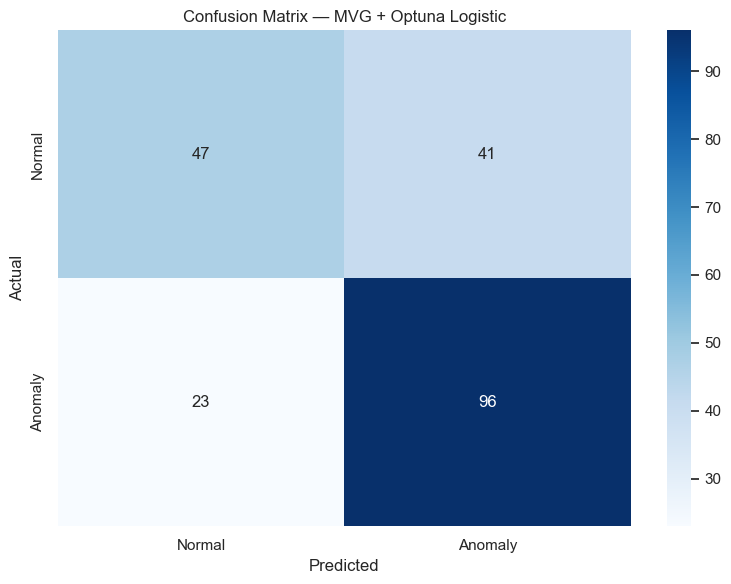

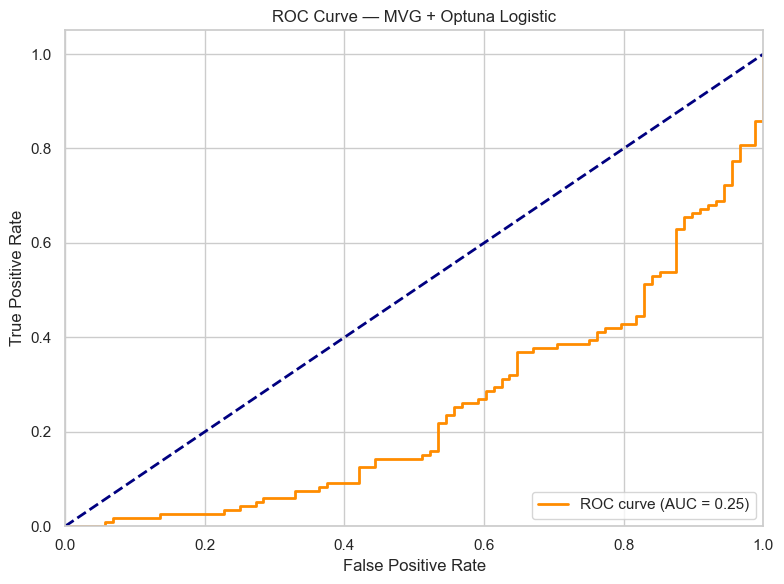

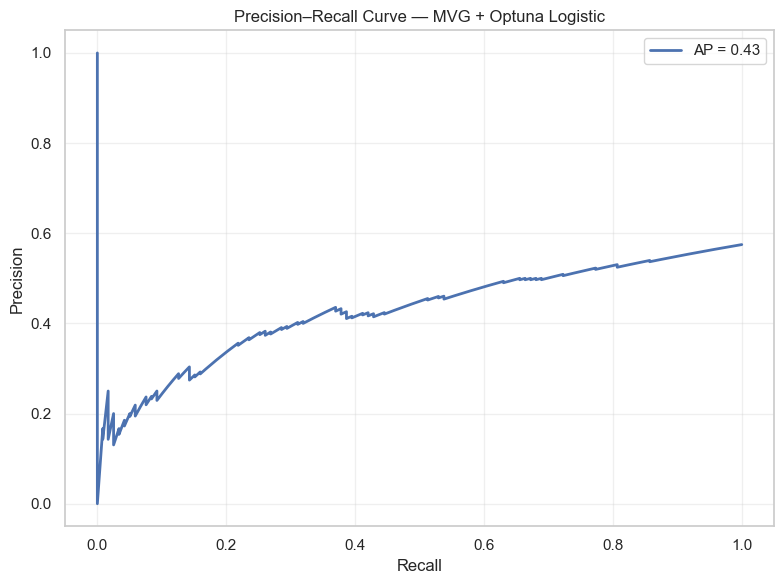

C:\Users\andre\AppData\Local\Temp\ipykernel_19984\2085112101.py:45: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\andre\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


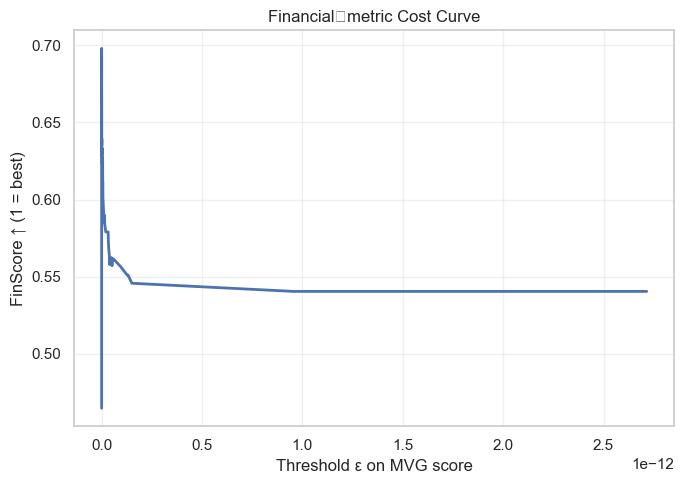

In [24]:
# Final Evaluation on the Test Set
p_MVG_test = multivariate_gaussian_pdf(X_test, mu, sigma)
y_MVG_pred_test = (p_MVG_test < best_epsilon).astype(int)

# # Anomaly scores using negative log-likelihood
# y_score_MVG = -np.log(p_MVG_test + 1e-12)

# # Evaluate
# evaluate_model(y_test, y_MVG_pred_test, y_score=y_score_MVG, model_name="MVG + Optuna ε")

# Use raw probability scores for ROC curve

precision, recall, f1, fin_score = evaluate_model(
    y_true       = y_test,
    y_pred       = y_MVG_pred_test,
    y_score      = p_MVG_test,
    model_name   = "MVG + Optuna Logistic",
    mean_anomaly = mean_anomaly,
    mean_normal  = mean_normal
)

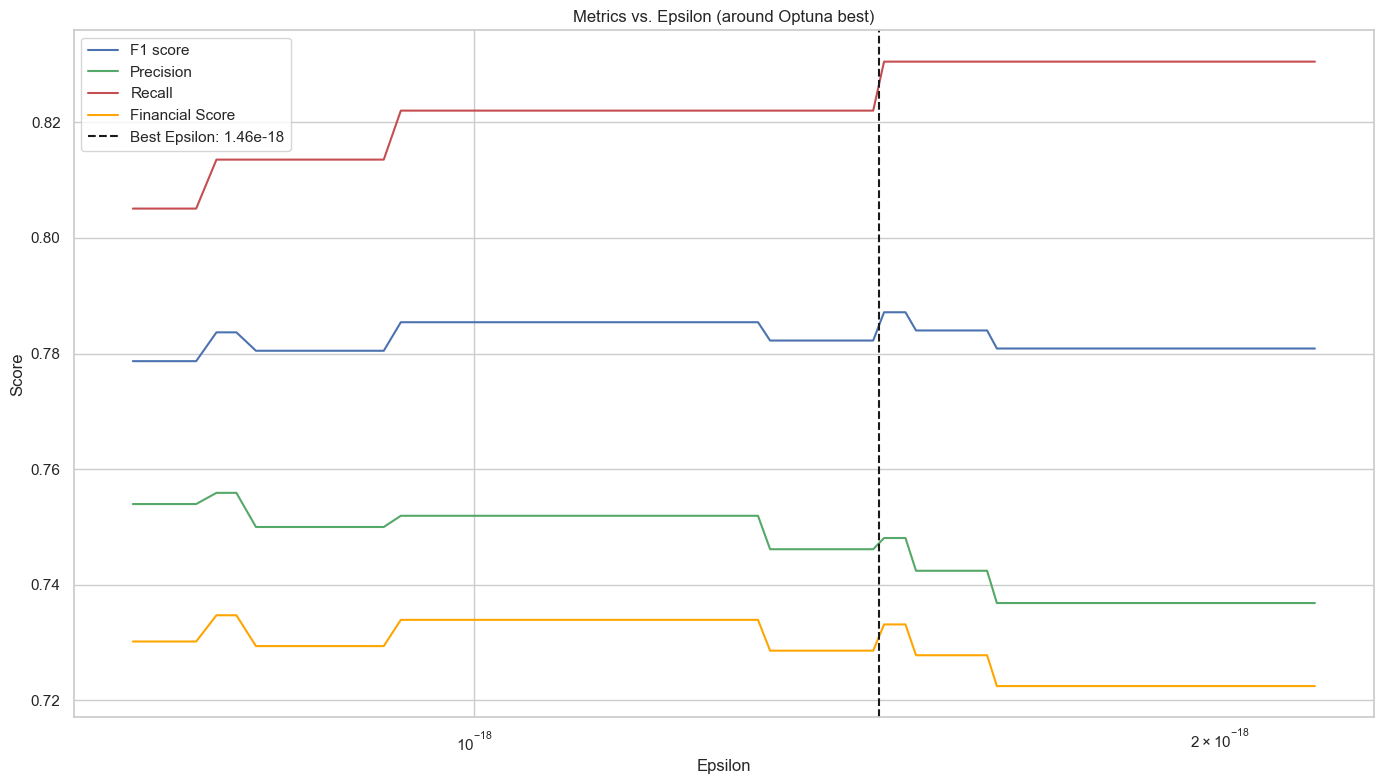

In [19]:
# -Plot Metrics Around Best Epsilon
epsilons_fine = np.linspace(best_epsilon * 0.5, best_epsilon * 1.5, 100)
f1_scores = []
precisions = []
recalls = []
fin_scores = []

for eps in epsilons_fine:
    preds = (p_MVG_cv < eps).astype(int)
    precision = precision_score(y_cross_val, preds, zero_division=0)
    recall = recall_score(y_cross_val, preds, zero_division=0)
    f1 = 2 * precision * recall / (precision + recall) if precision + recall > 0 else 0
    fin_score = financial_score(y_cross_val, preds, mean_anomaly=mean_anomaly, mean_normal=mean_normal)
    f1_scores.append(f1)
    precisions.append(precision)
    recalls.append(recall)
    fin_scores.append(fin_score)

plt.figure(figsize=(14, 8))
plt.plot(epsilons_fine, f1_scores, label='F1 score', color='b')
plt.plot(epsilons_fine, precisions, label='Precision', color='g')
plt.plot(epsilons_fine, recalls, label='Recall', color='r')
plt.plot(epsilons_fine, fin_scores, label='Financial Score', color='orange')
plt.axvline(best_epsilon, linestyle='--', color='k', label=f'Best Epsilon: {best_epsilon:.2e}')
plt.xlabel('Epsilon')
plt.ylabel('Score')
plt.title('Metrics vs. Epsilon (around Optuna best)')
plt.legend()
plt.grid(True)
plt.xscale('log')
plt.tight_layout()
plt.show()

c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
C:\Users\andre\AppData\Local\Temp\ipykernel_19984\2902658377.py:66: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0, 0, 0.95, 0.95])  # Leave space on the right


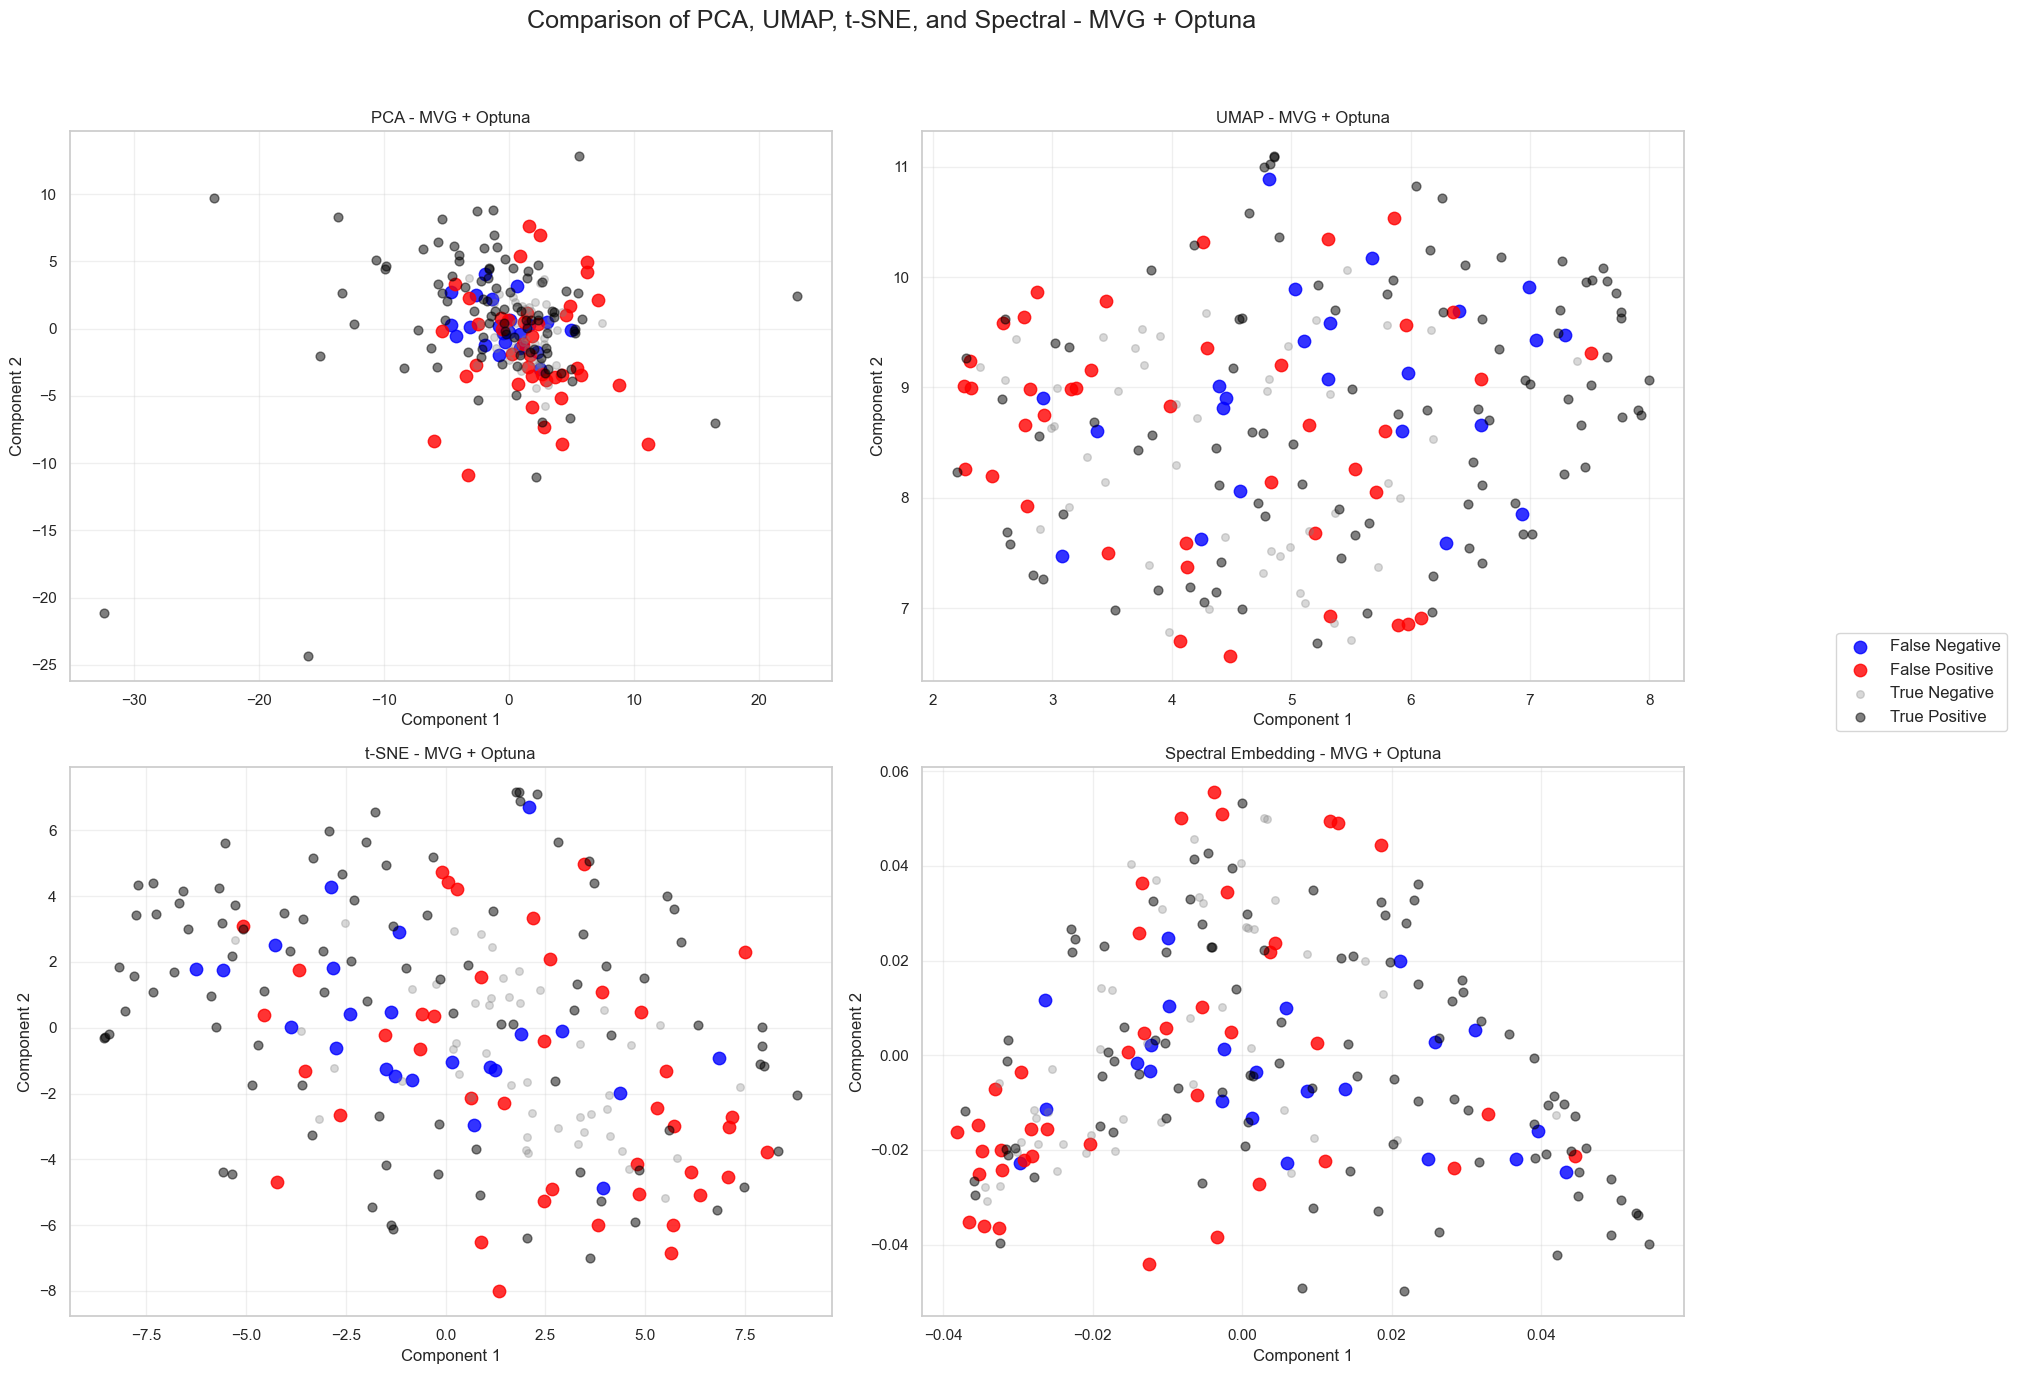

In [20]:
# Visualize PCA, UMAP, and t-SNE for the test set
compare_dim_reductions(X_test, y_test, y_MVG_pred_test, model_name="MVG + Optuna")